# Praca Domowa 1.
Weronika Orzechowska (327461)

#### Pakiety

In [1]:
import numpy as np
import pandas as pd

import random

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import sklearn.metrics as sm

In [2]:
random_state = 3

## Zbiór danych i wstępna analiza

In [3]:
# zaczytanie danych oraz usuniecie zbednej kolumny indeksowej

X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
X = X.drop(columns=['Unnamed: 0'])
y = y.drop(columns=['Unnamed: 0'])

In [4]:
# czy w zbiorze X wystepuja braki danych?
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       949 non-null    float64
 1   1       949 non-null    float64
 2   2       949 non-null    float64
 3   3       949 non-null    float64
 4   4       949 non-null    float64
 5   5       949 non-null    float64
 6   6       949 non-null    float64
 7   7       949 non-null    float64
dtypes: float64(8)
memory usage: 59.4 KB


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

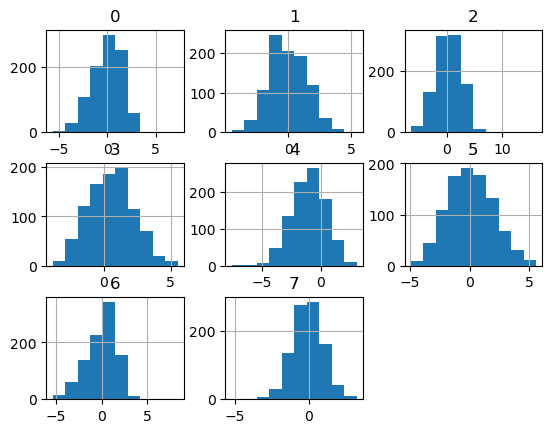

In [5]:
# rozklady zmiennych w zbiorze X
X.hist()

In [6]:
# czy w zbiorze y wystepuja braki danych?
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       946 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


array([[<Axes: title={'center': '0'}>]], dtype=object)

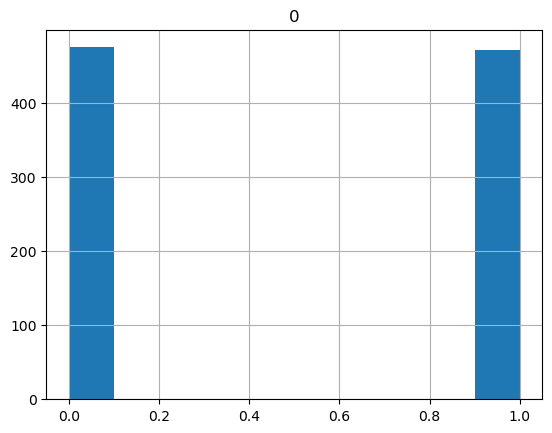

In [7]:
# jaki jest stosunek obserwacji klas?
y.hist()

In [8]:
# usuniecie brakow danych
missing_data_rows = y[y.isnull().any(axis=1)].index.tolist()
y = y.dropna()
X = X.drop(missing_data_rows)

In [9]:
# podzial na zbior treningowy i testowy w proporcji 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

# Eksperyment

In [10]:
# funkcja evaluate_model posluzy do przeprowadzenia eksperymentu


def evaluate_model(X_train, y_train, X_test, y_test, 
                   criterion = 'gini', max_depth = None, min_samples_leaf = 1,
                   splitter = 'best', min_impurity_decrease = 0.0):

    # stworzenie modelu drzewa decyzyjnego z podanymi hiperparametrami
    clf = DecisionTreeClassifier(criterion=criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf, 
                                 splitter = splitter, min_impurity_decrease = min_impurity_decrease,
                                 random_state = random_state)
    # 10-krotna kroswalidacja
    auc_scores_train = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')
    
    # dopasowanie modelu do danych treningowych
    clf.fit(X_train, y_train)
    
    # wyznaczenie wartosci AUC na zbiorze testowym 
    y_pred_proba_test = clf.predict_proba(X_test)[:, 1] 
    auc_test = sm.roc_auc_score(y_test, y_pred_proba_test)
    
    return auc_scores_train, auc_test

### 1. Kryterium podziału

In [11]:
criterion = ['gini', 'entropy']

In [12]:
for c in criterion:
    
    auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, criterion = c)
    
    print(f'Kryterium: {c}')
    print(f'  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): {auc_train.mean():.4f}')
    print(f'  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): {auc_train.std():.4f}')
    print(f'  AUC na zbiorze testowym: {auc_test:.4f}')

Kryterium: gini
  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.8685
  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.0210
  AUC na zbiorze testowym: 0.8521
Kryterium: entropy
  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.8881
  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.0218
  AUC na zbiorze testowym: 0.8592


### 2. Głębokość drzewa 

In [13]:
auc_train_mean_list_depth = []
auc_train_sd_list_depth = []
auc_test_list_depth = []

for i in range(7,20):
    
    auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, max_depth = i)
    
    auc_train_mean_list_depth.append(auc_train.mean())
    auc_train_sd_list_depth.append(auc_train.std())
    auc_test_list_depth.append(auc_test)

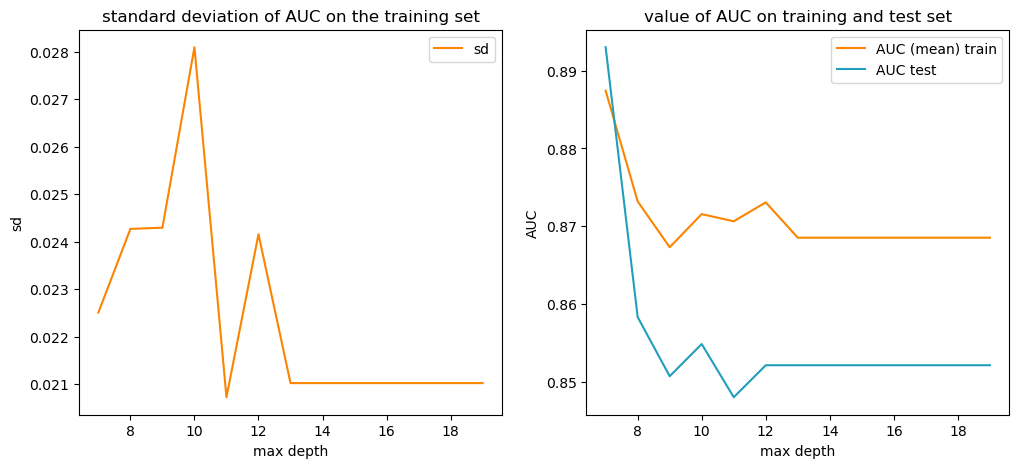

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(range(7,20), auc_train_mean_list_depth, label="AUC (mean) train", color="#fb8500")
axes[1].plot(range(7,20), auc_test_list_depth, label="AUC test", color="#219ebc")
axes[1].set_xlabel("max depth")
axes[1].set_ylabel("AUC")
axes[1].set_title("value of AUC on training and test set")
axes[1].legend()

axes[0].plot(range(7,20), auc_train_sd_list_depth, label="sd", color="#fb8500")
axes[0].set_xlabel("max depth")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()


### 3. Minimalna liczba obserwacji w liściu

In [15]:
auc_train_mean_list_leaf = []
auc_train_sd_list_leaf = []
auc_test_list_leaf = []

for i in range(5,100):
    
    auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, min_samples_leaf = i)
    
    auc_train_mean_list_leaf.append(auc_train.mean())
    auc_train_sd_list_leaf.append(auc_train.std())
    auc_test_list_leaf.append(auc_test)

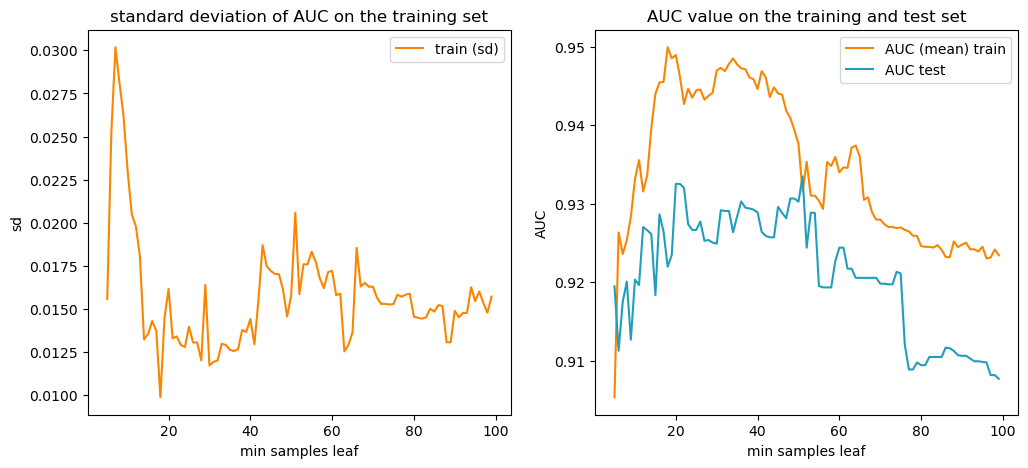

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(range(5,100), auc_train_mean_list_leaf, label="AUC (mean) train", color="#fb8500")
axes[1].plot(range(5,100), auc_test_list_leaf, label="AUC test", color="#219ebc")
axes[1].set_xlabel("min samples leaf")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

axes[0].plot(range(5,100), auc_train_sd_list_leaf, label="train (sd)", color="#fb8500")
axes[0].set_xlabel("min samples leaf")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()


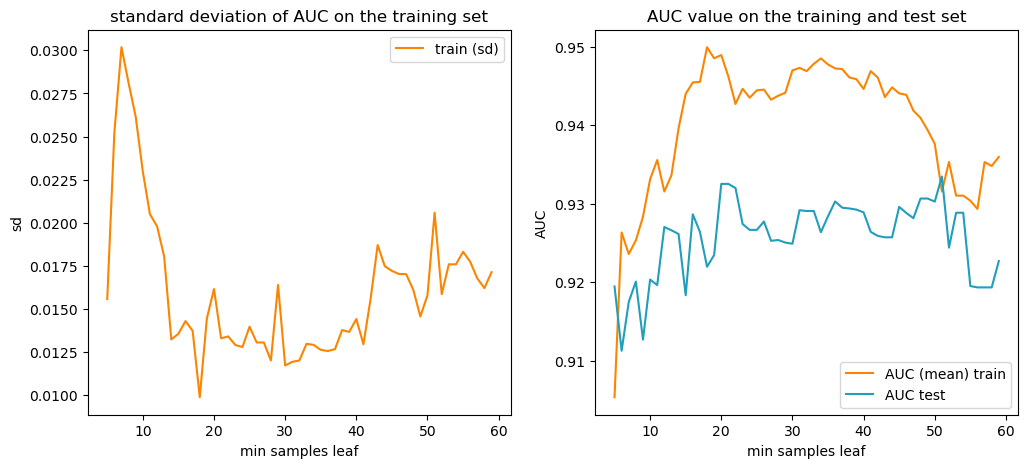

In [17]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(range(5,60), auc_train_mean_list_leaf[:55], label="AUC (mean) train", color="#fb8500")
axes[1].plot(range(5,60), auc_test_list_leaf[:55], label="AUC test", color="#219ebc")
axes[1].set_xlabel("min samples leaf")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

axes[0].plot(range(5,60), auc_train_sd_list_leaf[:55], label="train (sd)", color="#fb8500")
axes[0].set_xlabel("min samples leaf")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()


### 4. Dodatkowe parametry

#### 1. Strategia podziału

In [18]:
splitter = ['best', 'random']

for s in splitter:
    
    auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, splitter = s)
    
    print(f'Kryterium: {s}')
    print(f'  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): {auc_train.mean():.4f}')
    print(f'  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): {auc_train.std():.4f}')
    print(f'  AUC na zbiorze testowym: {auc_test:.4f}')

Kryterium: best
  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.8685
  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.0210
  AUC na zbiorze testowym: 0.8521
Kryterium: random
  Średnia AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.8699
  Odchylenie standardowe AUC na zbiorze treningowym (10-krotna kroswalidacja): 0.0385
  AUC na zbiorze testowym: 0.8732


#### 2. Minimalny spadek niepewności

In [19]:
auc_train_mean_list_impurity = []
auc_train_sd_list_impurity = []
auc_test_list_impurity = []
impurity = 0

for i in range(0,100):
    auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, min_impurity_decrease = impurity)
    auc_train_mean_list_impurity.append(auc_train.mean())
    auc_train_sd_list_impurity.append(auc_train.std())
    auc_test_list_impurity.append(auc_test)
    impurity  = impurity + 0.01

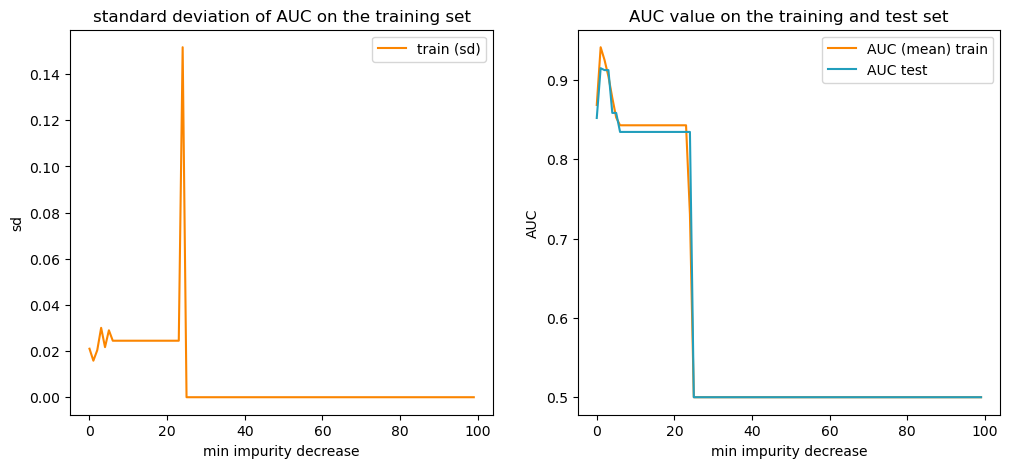

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[1].plot(range(0,100), auc_train_mean_list_impurity, label="AUC (mean) train", color="#fb8500")
axes[1].plot(range(0,100), auc_test_list_impurity, label="AUC test", color="#219ebc")
axes[1].set_xlabel("min impurity decrease")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

axes[0].plot(range(0,100), auc_train_sd_list_impurity, label="train (sd)", color="#fb8500")
axes[0].set_xlabel("min impurity decrease")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()

### 5. Podsumowanie powyższych parametrów

In [21]:
criterion = ['gini', 'entropy']
results = []
for criterion in criterion:
    for d in range(8,10):
        for l in range(10,25):
            auc_train, auc_test = evaluate_model(X_train, y_train, X_test, y_test, 
                                                                    criterion = criterion, max_depth = d, min_samples_leaf = l)
            results.append({
                'kryterium': criterion,
                'głębokość': d,
                'liczba_liści': l,
                'auc_train_mean': auc_train.mean(),
                'auc_train_sd': auc_train.std(),
                'auc_test': auc_test
            })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='auc_test', ascending=False).head(20)
results_df

,kryterium,głębokość,liczba_liści,auc_train_mean,auc_train_sd,auc_test
35,entropy,8,15,0.952981,0.025820,0.936074
50,entropy,9,15,0.952981,0.025820,0.936074
51,entropy,9,16,0.950200,0.020407,0.935355
36,entropy,8,16,0.950200,0.020407,0.935355
41,entropy,8,21,0.952278,0.014946,0.933173
56,entropy,9,21,0.952278,0.014946,0.933173
42,entropy,8,22,0.947262,0.016693,0.932652
57,entropy,9,22,0.947262,0.016693,0.932652
10,gini,8,20,0.948921,0.016162,0.932528
26,gini,9,21,0.946185,0.013305,0.932528


### 6. Przycinanie drzewa decyzyjnego

In [22]:
def tree_pruning_test(criterion = criterion, random_state = random_state):
    Tree = tree.DecisionTreeClassifier(criterion = criterion, random_state=random_state)
    path = Tree.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas

    auc_scores_train_mean_list = []
    auc_scores_train_sd_list = []
    auc_test_list = []

    for ccp_alpha in ccp_alphas:
        clf = tree.DecisionTreeClassifier(random_state=random_state, ccp_alpha=ccp_alpha)

        auc_scores_train = cross_val_score(clf, X_train, y_train, cv=10, scoring='roc_auc')  
        clf.fit(X_train, y_train)
    
        y_pred_proba_test = clf.predict_proba(X_test)[:, 1] 
        auc_test = sm.roc_auc_score(y_test, y_pred_proba_test)
    
        auc_scores_train_mean_list.append(auc_scores_train.mean())
        auc_scores_train_sd_list.append(auc_scores_train.std())
        auc_test_list.append(auc_test)
    
    return auc_scores_train_mean_list, auc_scores_train_sd_list, auc_test_list, ccp_alphas

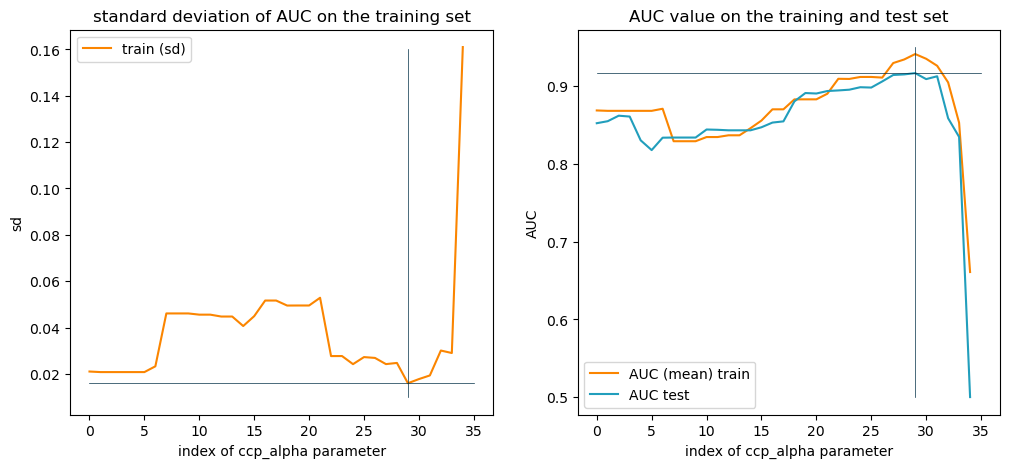

In [23]:
auc_scores_train_mean_list, auc_scores_train_sd_list, auc_test_list, ccp_alphas = tree_pruning_test(criterion = 'gini')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(0,len(ccp_alphas)), auc_scores_train_sd_list, label="train (sd)", color="#fb8500")
axes[0].plot(np.repeat(29, 2), np.array([0.01, 0.16]), color="#023047", linewidth = 0.5)
axes[0].plot(np.array([0, 35]), np.repeat(auc_scores_train_sd_list[29], 2), color="#023047", linewidth = 0.5)
axes[0].set_xlabel("index of ccp_alpha parameter")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()

axes[1].plot(range(0,len(ccp_alphas)), auc_scores_train_mean_list, label="AUC (mean) train", color="#fb8500")
axes[1].plot(range(0,len(ccp_alphas)), auc_test_list, label="AUC test", color="#219ebc")
axes[1].plot(np.repeat(29, 2), np.array([0.5, 0.95]), color="#023047", linewidth = 0.5)
axes[1].plot(np.array([0, 35]), np.repeat(auc_test_list[29], 2), color="#023047", linewidth = 0.5)
axes[1].set_xlabel("index of ccp_alpha parameter")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

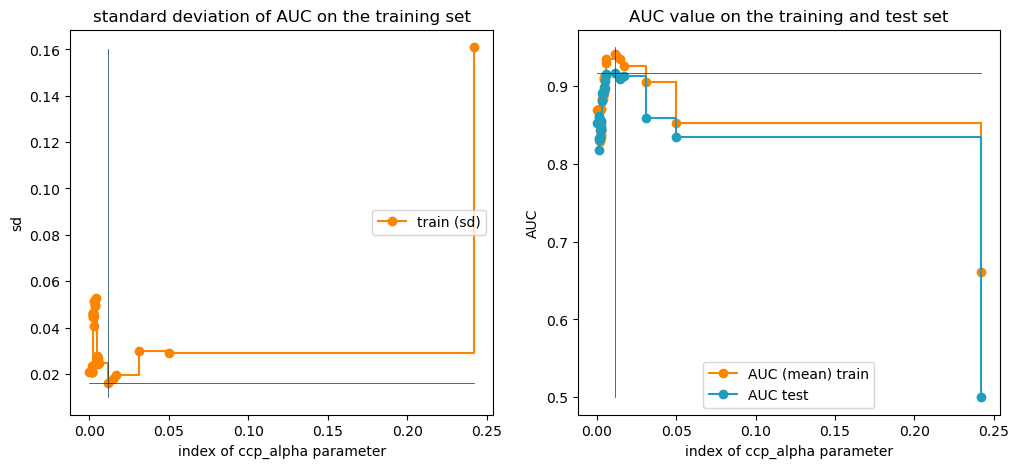

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ccp_alphas, auc_scores_train_sd_list, label="train (sd)", marker = "o", drawstyle="steps-post", color = "#fb8500")
axes[0].plot(np.repeat(ccp_alphas[29], 2), np.array([0.01, 0.16]), color="#023047", linewidth = 0.5)
axes[0].plot([ccp_alphas[0], ccp_alphas[-1]], np.repeat(auc_scores_train_sd_list[29], 2), color="#023047", linewidth = 0.5)
axes[0].set_xlabel("index of ccp_alpha parameter")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()

axes[1].plot(ccp_alphas, auc_scores_train_mean_list, label="AUC (mean) train", color="#fb8500", marker = "o", drawstyle="steps-post")
axes[1].plot(ccp_alphas, auc_test_list, label="AUC test", color="#219ebc", marker = "o", drawstyle="steps-post")
axes[1].plot(np.repeat(ccp_alphas[29], 2), np.array([0.5, 0.95]), color="#023047", linewidth = 0.5)
axes[1].plot([ccp_alphas[0], ccp_alphas[-1]], np.repeat(auc_test_list[29], 2), color="#023047", linewidth = 0.5)
axes[1].set_xlabel("index of ccp_alpha parameter")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

In [25]:
ccp_alphas[29]

0.011537661690937805

In [26]:
auc_test_list[29]

0.9165096211069232

In [27]:
auc_scores_train_mean_list, auc_scores_train_sd_list, auc_test_list, ccp_alphas = tree_pruning_test(criterion = 'entropy')

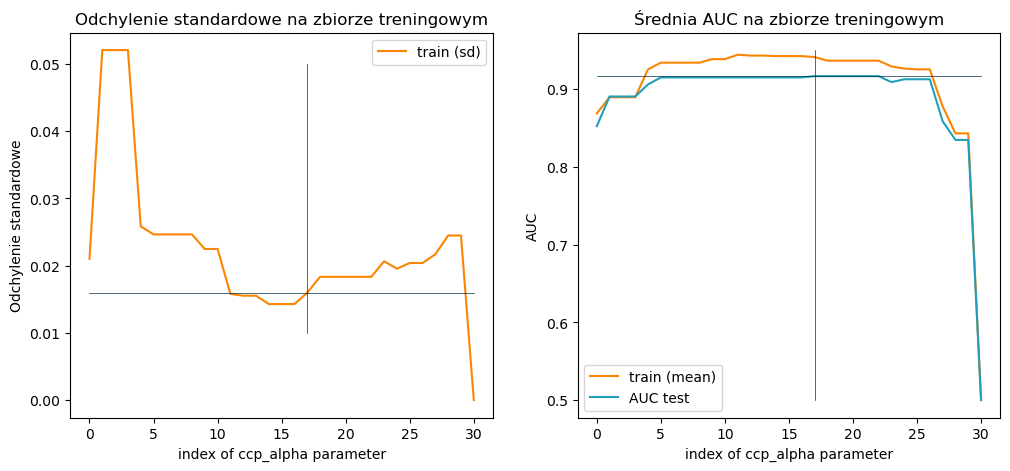

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(0,len(ccp_alphas)), auc_scores_train_sd_list, label="train (sd)", color="#fb8500")
axes[0].plot(np.repeat(17, 2), np.array([0.01, 0.05]), color="#023047", linewidth = 0.5)
axes[0].plot(np.array([0, 30]), np.repeat(auc_scores_train_sd_list[17], 2), color="#023047", linewidth = 0.5)
axes[0].set_xlabel("index of ccp_alpha parameter")
axes[0].set_ylabel("Odchylenie standardowe")
axes[0].set_title("Odchylenie standardowe na zbiorze treningowym")
axes[0].legend()

axes[1].plot(range(0,len(ccp_alphas)), auc_scores_train_mean_list, label="train (mean)", color="#fb8500")
axes[1].plot(range(0,len(ccp_alphas)), auc_test_list, label="AUC test", color="#219ebc")
axes[1].plot(np.repeat(17, 2), np.array([0.5, 0.95]), color="#023047", linewidth = 0.5)
axes[1].plot(np.array([0, 30]), np.repeat(auc_test_list[17], 2), color="#023047", linewidth = 0.5)
axes[1].set_xlabel("index of ccp_alpha parameter")
axes[1].set_ylabel("AUC")
axes[1].set_title("Średnia AUC na zbiorze treningowym")
axes[1].legend()

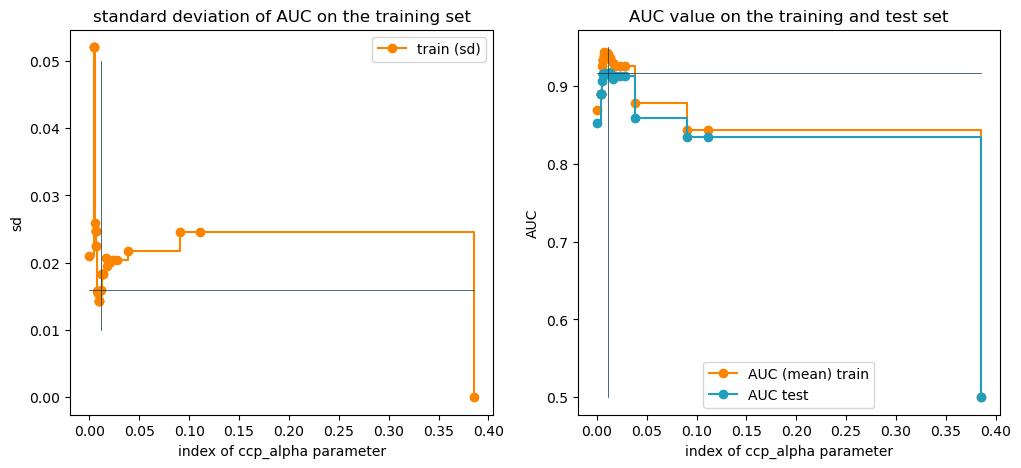

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(ccp_alphas, auc_scores_train_sd_list, label="train (sd)", marker = "o", drawstyle="steps-post", color = "#fb8500")
axes[0].plot(np.repeat(ccp_alphas[17], 2), np.array([0.01, 0.05]), color="#023047", linewidth = 0.5)
axes[0].plot([ccp_alphas[0], ccp_alphas[-1]], np.repeat(auc_scores_train_sd_list[17], 2), color="#023047", linewidth = 0.5)
axes[0].set_xlabel("index of ccp_alpha parameter")
axes[0].set_ylabel("sd")
axes[0].set_title("standard deviation of AUC on the training set")
axes[0].legend()

axes[1].plot(ccp_alphas, auc_scores_train_mean_list, label="AUC (mean) train", color="#fb8500", marker = "o", drawstyle="steps-post")
axes[1].plot(ccp_alphas, auc_test_list, label="AUC test", color="#219ebc", marker = "o", drawstyle="steps-post")
axes[1].plot(np.repeat(ccp_alphas[17], 2), np.array([0.5, 0.95]), color="#023047", linewidth = 0.5)
axes[1].plot([ccp_alphas[0], ccp_alphas[-1]], np.repeat(auc_test_list[17], 2), color="#023047", linewidth = 0.5)
axes[1].set_xlabel("index of ccp_alpha parameter")
axes[1].set_ylabel("AUC")
axes[1].set_title("AUC value on the training and test set")
axes[1].legend()

In [30]:
ccp_alphas[17]

0.011643234429442435

In [31]:
auc_test_list[17]

0.9165096211069232

# Analiza jakości predykcyjnej modelu

In [32]:
# wybrane hiperparametry na podstawie przeprowadzonego eksperymentu
criterion = 'entropy'
max_depth = 8
min_samples_leaf = 15

In [33]:
Tree = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                   min_samples_leaf = min_samples_leaf, 
                                   random_state = random_state)
Tree = Tree.fit(X_train, y_train)

#### 1. Macierz pomyłek

In [34]:
sm.confusion_matrix(y_test, Tree.predict(X_test))

array([[131,  11],
       [ 31, 111]])

In [35]:
sm.confusion_matrix(y_train, Tree.predict(X_train))

array([[317,  16],
       [ 32, 297]])

#### 2. Dokładność, czułość, precyzja

In [36]:
sm.accuracy_score(y_test, Tree.predict(X_test))

0.852112676056338

In [37]:
sm.accuracy_score(y_train, Tree.predict(X_train))

0.9274924471299094

In [38]:
sm.recall_score(y_test, Tree.predict(X_test))

0.7816901408450704

In [39]:
sm.recall_score(y_train, Tree.predict(X_train))

0.9027355623100304

In [40]:
sm.precision_score(y_test, Tree.predict(X_test))

0.9098360655737705

In [41]:
sm.precision_score(y_train, Tree.predict(X_train))

0.9488817891373802

#### 3. Krzywa ROC, wartość AUC

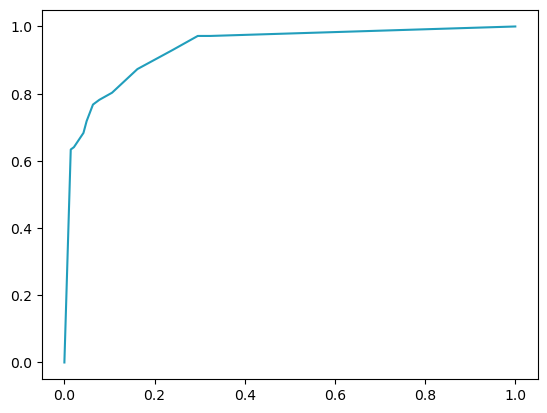

In [42]:
pred = Tree.predict_proba(X_test)

fpr, tpr, thresholds = sm.roc_curve(y_test, pred[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(sm.roc_auc_score(y_test, pred[:,1]), 4)), color = "#219ebc")

In [43]:
sm.roc_auc_score(y_test, Tree.predict_proba(X_test)[:, 1])

0.9360741916286452

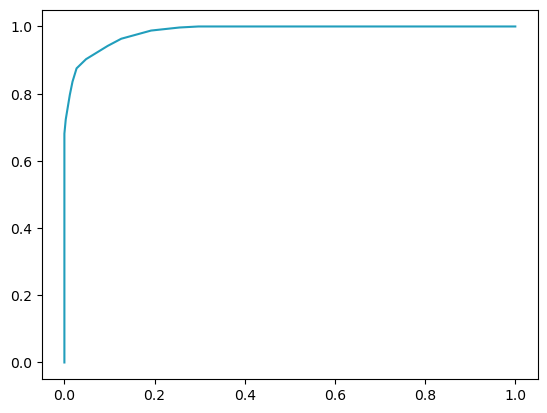

In [46]:
pred = Tree.predict_proba(X_train)

fpr, tpr, thresholds = sm.roc_curve(y_train, pred[:,1])
plt.plot(fpr,tpr,label="Tree, AUC="+str(round(sm.roc_auc_score(y_train, pred[:,1]), 4)), color = "#219ebc")

In [47]:
sm.roc_auc_score(y_train, Tree.predict_proba(X_train)[:, 1])

0.9849165274697189

# Wpływ rozmiaru próbki danych na jakość predykcyjną modelu

In [48]:
# tworzymy dwie tablice: jedna z rozmiarami danych, druga z indeksami ze zbioru (do losowania)
size = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]
index = [i for i in y_train.index]

#### 1. Bez kroswalidacji

In [49]:
auc_train_list = []
auc_test_list = []

for i in range(0, len(size)):
    random.seed(random_state)
    # liczba obserwacji uzyta w danej iteracji
    num_obs = int(size[i] * len(index))
    # wektor losowych indeksow
    random_rows = random.sample(index, num_obs)

    # losowo zmniejszone zbiory
    Xs_train = X_train.loc[random_rows]
    ys_train = y_train.loc[random_rows]

    # stworzenie i dopasowanie drzewa 
    Tree_small = tree.DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf)
    Tree_small = Tree_small.fit(Xs_train, ys_train)

    # wyznaczenie miary AUC na zbiorze treningowym
    pred = Tree_small.predict_proba(Xs_train)[:, 1]
    auc_train = sm.roc_auc_score(ys_train, pred)
    auc_train_list.append(auc_train)

    # wyznaczenie miary AUC na zbiorze testowym
    pred = Tree_small.predict_proba(X_test)[:, 1]
    auc_test = sm.roc_auc_score(y_test, pred)
    auc_test_list.append(auc_test)

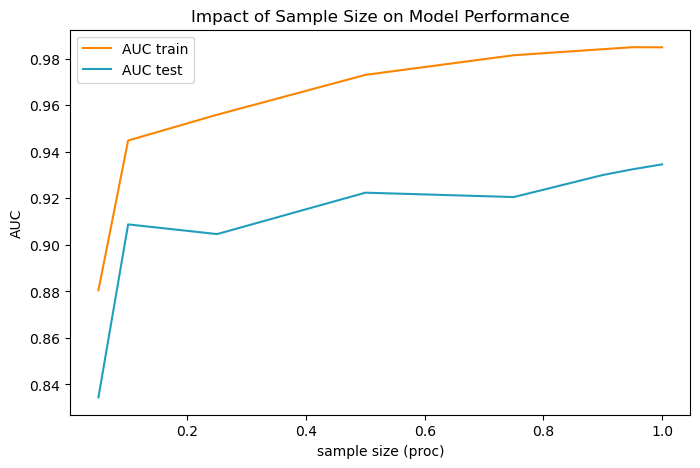

In [50]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(size, auc_train_list, label="AUC train", color="#fb8500")
ax.plot(size, auc_test_list, label="AUC test", color="#219ebc")

ax.set_xlabel("sample size (proc)")
ax.set_ylabel("AUC")
ax.set_title("Impact of Sample Size on Model Performance")
ax.legend()

2. Kros walidacja

In [51]:
auc_train_list = []
auc_test_list = []

for i in range(0, len(size)):
    random.seed(random_state)
    num_obs = int(size[i] * len(index))
    random_rows = random.sample(index, num_obs)

    Xs_train = X_train.loc[random_rows]
    ys_train = y_train.loc[random_rows]

    # wykorzystujemy funkcje z pierwszego eksperymentu
    auc_train, auc_test = evaluate_model(Xs_train, ys_train, X_test, y_test, 
                                         criterion = criterion, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

    auc_train_list.append(auc_train.mean())
    auc_test_list.append(auc_test)

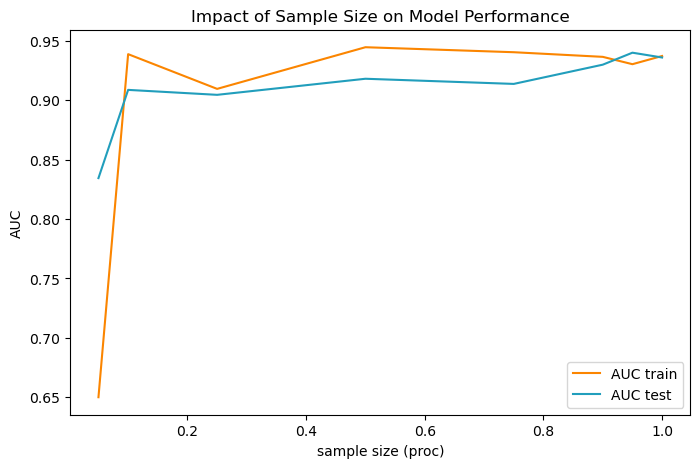

In [52]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(size, auc_train_list, label="AUC train", color="#fb8500")
ax.plot(size, auc_test_list, label="AUC test", color="#219ebc")

ax.set_xlabel("sample size (proc)")
ax.set_ylabel("AUC")
ax.set_title("Impact of Sample Size on Model Performance")
ax.legend()